In [52]:
import csv
import pandas as pd
import numpy as np
import scipy.stats as st
from matplotlib import pyplot as plt
from pathlib import Path

In [53]:
#Creating csv path
csv_activity = Path("Resources/FitBitStudy/dailyActivity_merged.csv")
csv_sleep = Path("Resources/FitBitStudy/sleepDay_merged.csv")
csv_stress = Path("Resources/Stress_Health_Study/Sleep_health_and_lifestyle_dataset.csv")

In [54]:
#Reading in CSV files
csv_reader_activity = pd.read_csv(csv_activity)
csv_reader_sleep = pd.read_csv(csv_sleep)
csv_reader_stress = pd.read_csv(csv_stress)

In [55]:
#Displaying dataframe for activity level
csv_reader_activity

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,1503960366,4/12/2016,13162,8.500000,8.500000,0.0,1.88,0.55,6.06,0.00,25,13,328,728,1985
1,1503960366,4/13/2016,10735,6.970000,6.970000,0.0,1.57,0.69,4.71,0.00,21,19,217,776,1797
2,1503960366,4/14/2016,10460,6.740000,6.740000,0.0,2.44,0.40,3.91,0.00,30,11,181,1218,1776
3,1503960366,4/15/2016,9762,6.280000,6.280000,0.0,2.14,1.26,2.83,0.00,29,34,209,726,1745
4,1503960366,4/16/2016,12669,8.160000,8.160000,0.0,2.71,0.41,5.04,0.00,36,10,221,773,1863
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
935,8877689391,5/8/2016,10686,8.110000,8.110000,0.0,1.08,0.20,6.80,0.00,17,4,245,1174,2847
936,8877689391,5/9/2016,20226,18.250000,18.250000,0.0,11.10,0.80,6.24,0.05,73,19,217,1131,3710
937,8877689391,5/10/2016,10733,8.150000,8.150000,0.0,1.35,0.46,6.28,0.00,18,11,224,1187,2832
938,8877689391,5/11/2016,21420,19.559999,19.559999,0.0,13.22,0.41,5.89,0.00,88,12,213,1127,3832


In [56]:
#Displaying dataframe for sleep
csv_reader_sleep.head(10)

,Id,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
0,1503960366,4/12/2016,1,327,346
1,1503960366,4/13/2016,2,384,407
2,1503960366,4/15/2016,1,412,442
3,1503960366,4/16/2016,2,340,367
4,1503960366,4/17/2016,1,700,712
5,1503960366,4/19/2016,1,304,320
6,1503960366,4/20/2016,1,360,377
7,1503960366,4/21/2016,1,325,364
8,1503960366,4/23/2016,1,361,384
9,1503960366,4/24/2016,1,430,449


In [57]:
#Renaming columns in our sleep dataframe
csv_reader_sleep = csv_reader_sleep.rename(columns={"SleepDay" : "ActivityDate"})
csv_reader_sleep.head(10)

,Id,ActivityDate,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
0,1503960366,4/12/2016,1,327,346
1,1503960366,4/13/2016,2,384,407
2,1503960366,4/15/2016,1,412,442
3,1503960366,4/16/2016,2,340,367
4,1503960366,4/17/2016,1,700,712
5,1503960366,4/19/2016,1,304,320
6,1503960366,4/20/2016,1,360,377
7,1503960366,4/21/2016,1,325,364
8,1503960366,4/23/2016,1,361,384
9,1503960366,4/24/2016,1,430,449


In [58]:
#Merging sleep and activity dataframes
merged_df = pd.merge(csv_reader_activity, csv_reader_sleep, on=["Id", "ActivityDate"])
merged_df.head()

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
0,1503960366,4/12/2016,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985,1,327,346
1,1503960366,4/13/2016,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797,2,384,407
2,1503960366,4/15/2016,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745,1,412,442
3,1503960366,4/16/2016,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863,2,340,367
4,1503960366,4/17/2016,9705,6.48,6.48,0.0,3.19,0.78,2.51,0.0,38,20,164,539,1728,1,700,712


In [59]:
#Examining how many data points exist in this dataframe
merged_df.shape

(413, 18)

In [60]:
#Examining how many data points are null
merged_df[merged_df["TotalMinutesAsleep"].isnull()].shape

(0, 18)

In [61]:
#Converting minutes to hours for consistency 
merged_df["TotalHoursAsleep"] = merged_df["TotalMinutesAsleep"]/60
merged_df

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed,TotalHoursAsleep
0,1503960366,4/12/2016,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985,1,327,346,5.450000
1,1503960366,4/13/2016,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797,2,384,407,6.400000
2,1503960366,4/15/2016,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745,1,412,442,6.866667
3,1503960366,4/16/2016,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863,2,340,367,5.666667
4,1503960366,4/17/2016,9705,6.48,6.48,0.0,3.19,0.78,2.51,0.0,38,20,164,539,1728,1,700,712,11.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
408,8792009665,4/30/2016,7174,4.59,4.59,0.0,0.33,0.36,3.91,0.0,10,20,301,749,2896,1,343,360,5.716667
409,8792009665,5/1/2016,1619,1.04,1.04,0.0,0.00,0.00,1.04,0.0,0,0,79,834,1962,1,503,527,8.383333
410,8792009665,5/2/2016,1831,1.17,1.17,0.0,0.00,0.00,1.17,0.0,0,0,101,916,2015,1,415,423,6.916667
411,8792009665,5/3/2016,2421,1.55,1.55,0.0,0.00,0.00,1.55,0.0,0,0,156,739,2297,1,516,545,8.600000


In [62]:
#Converting minutes to hours for consistency 
merged_df["VeryActiveHours"] = merged_df["VeryActiveMinutes"]/60
merged_df

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed,TotalHoursAsleep,VeryActiveHours
0,1503960366,4/12/2016,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985,1,327,346,5.450000,0.416667
1,1503960366,4/13/2016,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797,2,384,407,6.400000,0.350000
2,1503960366,4/15/2016,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745,1,412,442,6.866667,0.483333
3,1503960366,4/16/2016,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863,2,340,367,5.666667,0.600000
4,1503960366,4/17/2016,9705,6.48,6.48,0.0,3.19,0.78,2.51,0.0,38,20,164,539,1728,1,700,712,11.666667,0.633333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
408,8792009665,4/30/2016,7174,4.59,4.59,0.0,0.33,0.36,3.91,0.0,10,20,301,749,2896,1,343,360,5.716667,0.166667
409,8792009665,5/1/2016,1619,1.04,1.04,0.0,0.00,0.00,1.04,0.0,0,0,79,834,1962,1,503,527,8.383333,0.000000
410,8792009665,5/2/2016,1831,1.17,1.17,0.0,0.00,0.00,1.17,0.0,0,0,101,916,2015,1,415,423,6.916667,0.000000
411,8792009665,5/3/2016,2421,1.55,1.55,0.0,0.00,0.00,1.55,0.0,0,0,156,739,2297,1,516,545,8.600000,0.000000


In [63]:
#Converting minutes to hours for consistency 
merged_df["SedentaryHours"] = merged_df["SedentaryMinutes"]/60
merged_df

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,...,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed,TotalHoursAsleep,VeryActiveHours,SedentaryHours
0,1503960366,4/12/2016,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,...,13,328,728,1985,1,327,346,5.450000,0.416667,12.133333
1,1503960366,4/13/2016,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,...,19,217,776,1797,2,384,407,6.400000,0.350000,12.933333
2,1503960366,4/15/2016,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,...,34,209,726,1745,1,412,442,6.866667,0.483333,12.100000
3,1503960366,4/16/2016,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,...,10,221,773,1863,2,340,367,5.666667,0.600000,12.883333
4,1503960366,4/17/2016,9705,6.48,6.48,0.0,3.19,0.78,2.51,0.0,...,20,164,539,1728,1,700,712,11.666667,0.633333,8.983333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
408,8792009665,4/30/2016,7174,4.59,4.59,0.0,0.33,0.36,3.91,0.0,...,20,301,749,2896,1,343,360,5.716667,0.166667,12.483333
409,8792009665,5/1/2016,1619,1.04,1.04,0.0,0.00,0.00,1.04,0.0,...,0,79,834,1962,1,503,527,8.383333,0.000000,13.900000
410,8792009665,5/2/2016,1831,1.17,1.17,0.0,0.00,0.00,1.17,0.0,...,0,101,916,2015,1,415,423,6.916667,0.000000,15.266667
411,8792009665,5/3/2016,2421,1.55,1.55,0.0,0.00,0.00,1.55,0.0,...,0,156,739,2297,1,516,545,8.600000,0.000000,12.316667


In [64]:
#Converting minutes to hours for consistency 
merged_df["FairlyActiveHours"] = merged_df["FairlyActiveMinutes"]/60
merged_df

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,...,LightlyActiveMinutes,SedentaryMinutes,Calories,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed,TotalHoursAsleep,VeryActiveHours,SedentaryHours,FairlyActiveHours
0,1503960366,4/12/2016,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,...,328,728,1985,1,327,346,5.450000,0.416667,12.133333,0.216667
1,1503960366,4/13/2016,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,...,217,776,1797,2,384,407,6.400000,0.350000,12.933333,0.316667
2,1503960366,4/15/2016,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,...,209,726,1745,1,412,442,6.866667,0.483333,12.100000,0.566667
3,1503960366,4/16/2016,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,...,221,773,1863,2,340,367,5.666667,0.600000,12.883333,0.166667
4,1503960366,4/17/2016,9705,6.48,6.48,0.0,3.19,0.78,2.51,0.0,...,164,539,1728,1,700,712,11.666667,0.633333,8.983333,0.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
408,8792009665,4/30/2016,7174,4.59,4.59,0.0,0.33,0.36,3.91,0.0,...,301,749,2896,1,343,360,5.716667,0.166667,12.483333,0.333333
409,8792009665,5/1/2016,1619,1.04,1.04,0.0,0.00,0.00,1.04,0.0,...,79,834,1962,1,503,527,8.383333,0.000000,13.900000,0.000000
410,8792009665,5/2/2016,1831,1.17,1.17,0.0,0.00,0.00,1.17,0.0,...,101,916,2015,1,415,423,6.916667,0.000000,15.266667,0.000000
411,8792009665,5/3/2016,2421,1.55,1.55,0.0,0.00,0.00,1.55,0.0,...,156,739,2297,1,516,545,8.600000,0.000000,12.316667,0.000000


In [65]:
#Converting minutes to hours for consistency 
merged_df["LightlyActiveHours"] = merged_df["LightlyActiveMinutes"]/60
merged_df

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,...,SedentaryMinutes,Calories,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed,TotalHoursAsleep,VeryActiveHours,SedentaryHours,FairlyActiveHours,LightlyActiveHours
0,1503960366,4/12/2016,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,...,728,1985,1,327,346,5.450000,0.416667,12.133333,0.216667,5.466667
1,1503960366,4/13/2016,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,...,776,1797,2,384,407,6.400000,0.350000,12.933333,0.316667,3.616667
2,1503960366,4/15/2016,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,...,726,1745,1,412,442,6.866667,0.483333,12.100000,0.566667,3.483333
3,1503960366,4/16/2016,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,...,773,1863,2,340,367,5.666667,0.600000,12.883333,0.166667,3.683333
4,1503960366,4/17/2016,9705,6.48,6.48,0.0,3.19,0.78,2.51,0.0,...,539,1728,1,700,712,11.666667,0.633333,8.983333,0.333333,2.733333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
408,8792009665,4/30/2016,7174,4.59,4.59,0.0,0.33,0.36,3.91,0.0,...,749,2896,1,343,360,5.716667,0.166667,12.483333,0.333333,5.016667
409,8792009665,5/1/2016,1619,1.04,1.04,0.0,0.00,0.00,1.04,0.0,...,834,1962,1,503,527,8.383333,0.000000,13.900000,0.000000,1.316667
410,8792009665,5/2/2016,1831,1.17,1.17,0.0,0.00,0.00,1.17,0.0,...,916,2015,1,415,423,6.916667,0.000000,15.266667,0.000000,1.683333
411,8792009665,5/3/2016,2421,1.55,1.55,0.0,0.00,0.00,1.55,0.0,...,739,2297,1,516,545,8.600000,0.000000,12.316667,0.000000,2.600000


In [66]:
#Saving cleaned data to csv file
merged_df.to_csv("Resources/FitBitStudy/CleanFitbitData.csv")

In [67]:
#Data Analysis

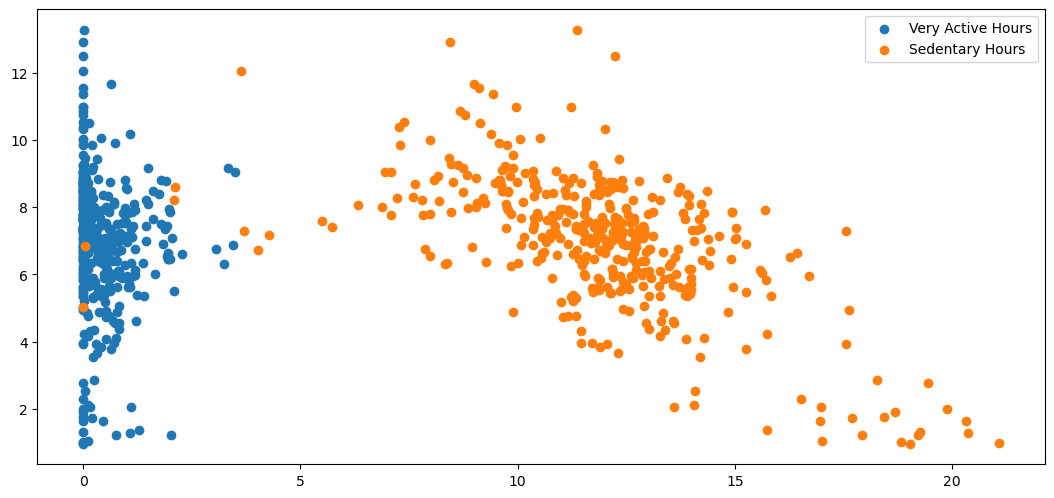

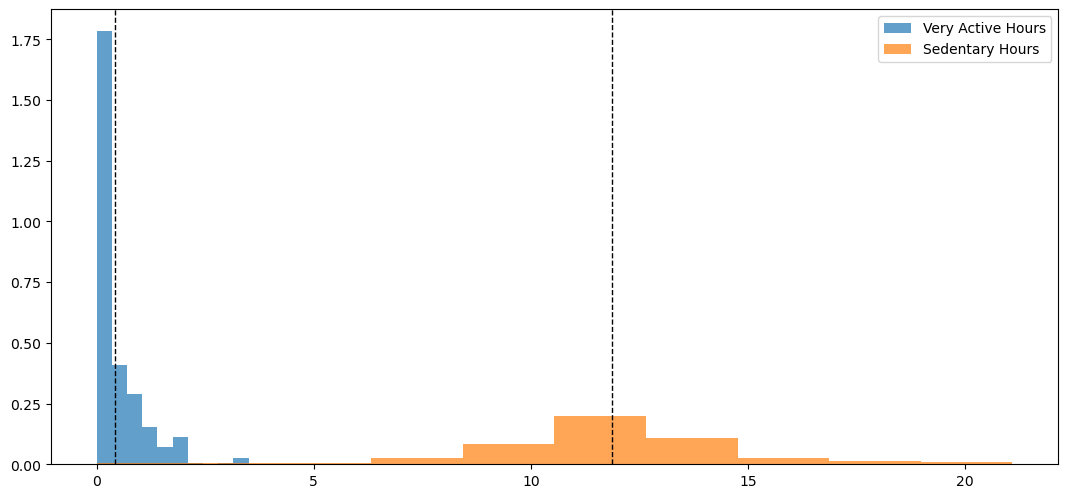

In [68]:
#Creating variables to make the scatterplot
very_active = merged_df["VeryActiveHours"]
sedentary = merged_df["SedentaryHours"]
asleep = merged_df["TotalHoursAsleep"]

#Combined scatter Plot of Sedentary and Active 
plt.subplot(2, 1, 1)
plt.scatter(very_active, asleep, label="Very Active Hours")
plt.scatter(sedentary, asleep, label="Sedentary Hours")
plt.rcParams["figure.figsize"] = [13, 13]
plt.legend()
plt.show()

#Histogram
plt.subplot(2, 1, 2)
plt.hist(very_active, 10, density=True, alpha=0.7, label="Very Active Hours")
plt.hist(sedentary, 10, density=True, alpha=0.7, label="Sedentary Hours")
plt.axvline(very_active.mean(), color="k", linestyle="dashed", linewidth=1)
plt.axvline(sedentary.mean(), color="k", linestyle="dashed", linewidth=1)
plt.legend()
plt.show()

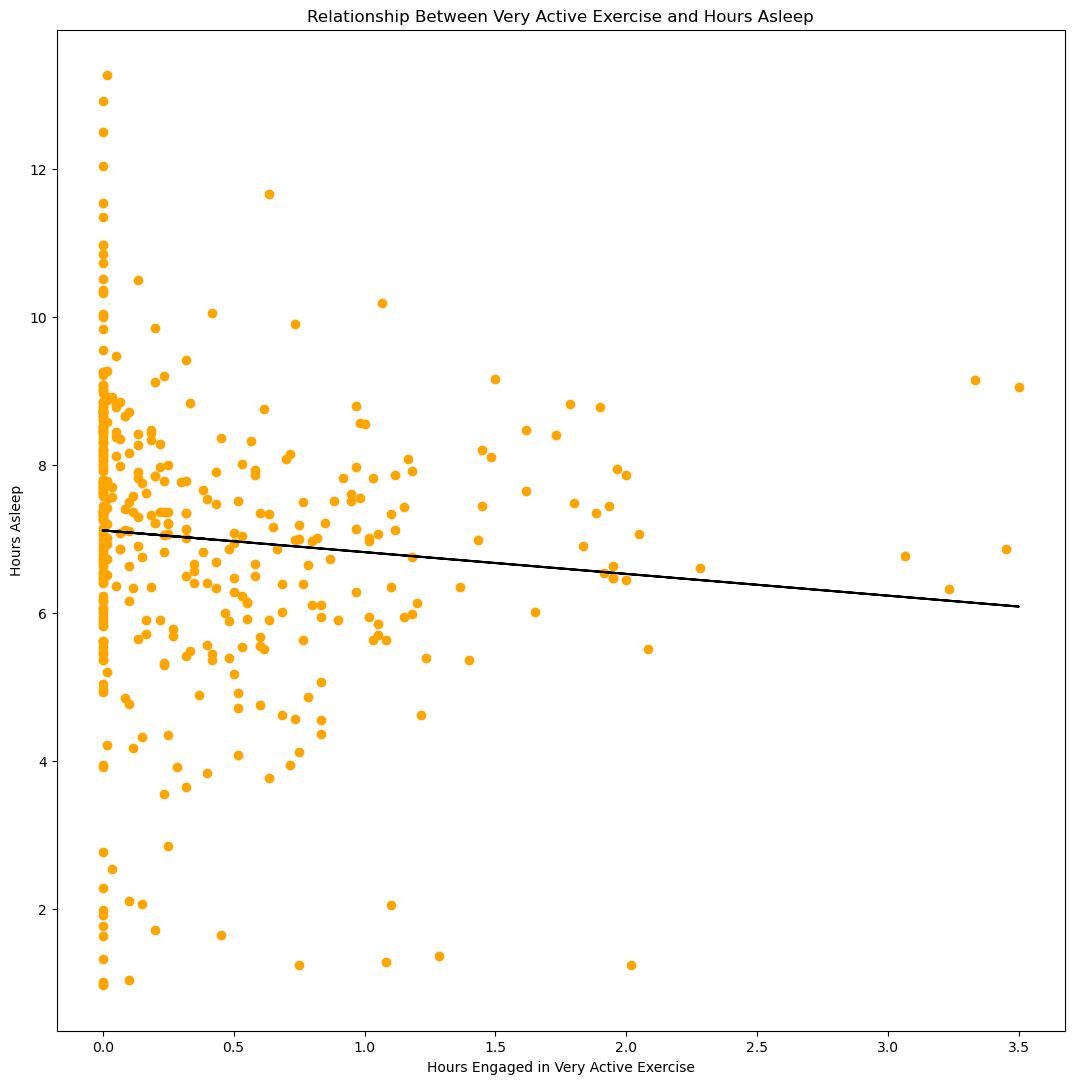

In [69]:
#Linear Regression for Very Active Minutes

slope_active = -0.294124366097534
x_active = very_active
intercept_active = 7.114599506881059
Best_Fit_Line_active = slope_active*x_active + intercept_active

plt.scatter(very_active, asleep, color = "orange", label="Very Active Hours")
plt.plot(very_active, Best_Fit_Line_active, color = "k")
plt.xlabel("Hours Engaged in Very Active Exercise")
plt.ylabel("Hours Asleep")
plt.title("Relationship Between Very Active Exercise and Hours Asleep")
st.pearsonr(very_active, asleep)
st.linregress(very_active, asleep)

plt.savefig('Figures/Relationship Between Very Active Exercise and Hours Asleep', bbox_inches='tight')

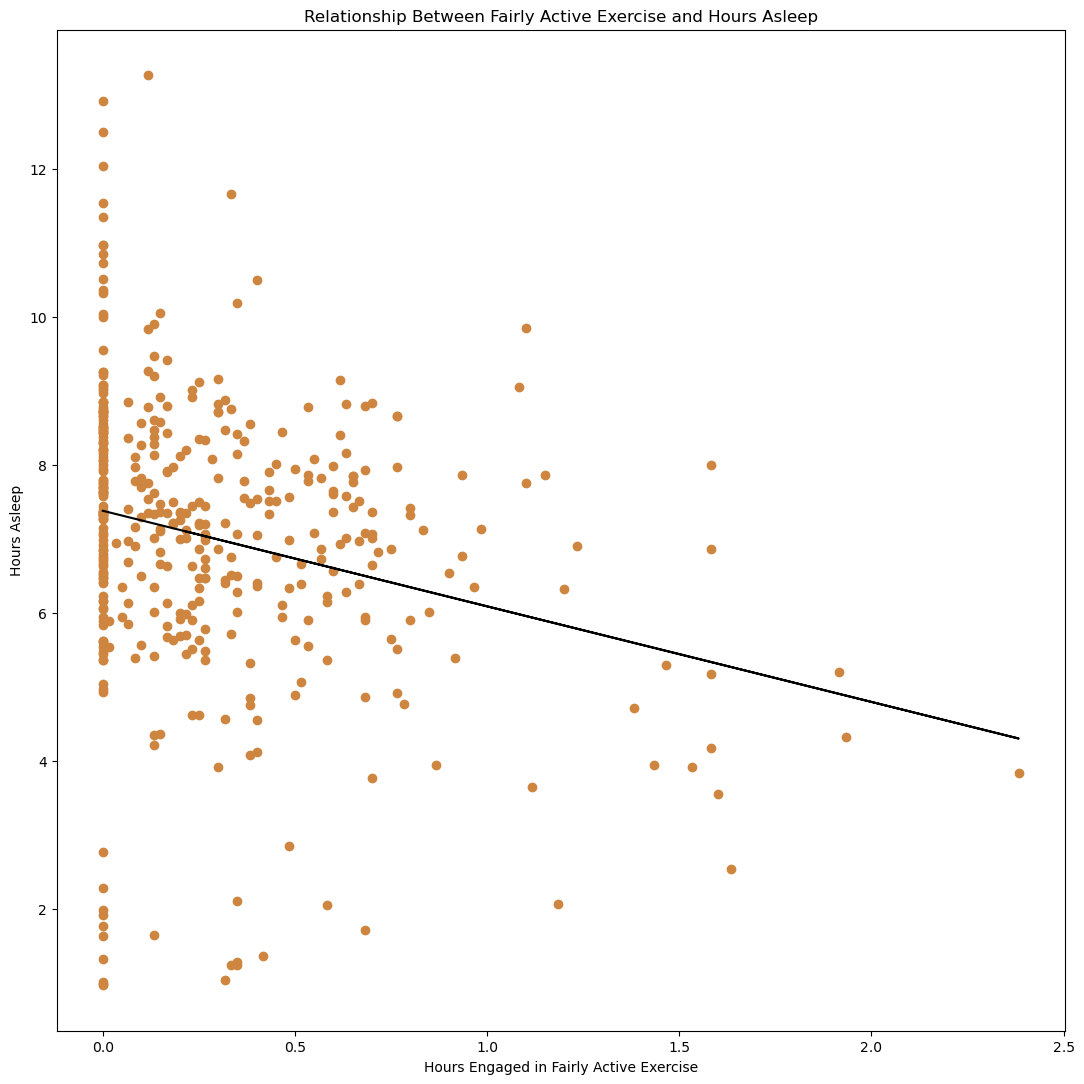

In [70]:
#Linear Regression for Fairly Active Minutes

fairly_active = merged_df["FairlyActiveHours"]

slope_active = -1.2917292626506878
x_active = fairly_active
intercept_active = 7.379474697608862
Best_Fit_Line_active = slope_active*x_active + intercept_active

plt.scatter(fairly_active, asleep, color = "peru", label="Fairly Active Hours")
plt.plot(fairly_active, Best_Fit_Line_active, color = "k")
plt.xlabel("Hours Engaged in Fairly Active Exercise")
plt.ylabel("Hours Asleep")
plt.title("Relationship Between Fairly Active Exercise and Hours Asleep")
st.pearsonr(fairly_active, asleep)
st.linregress(fairly_active, asleep)

plt.savefig('Figures/Relationship Between Fairly Active Exercise and Hours Asleep', bbox_inches='tight')

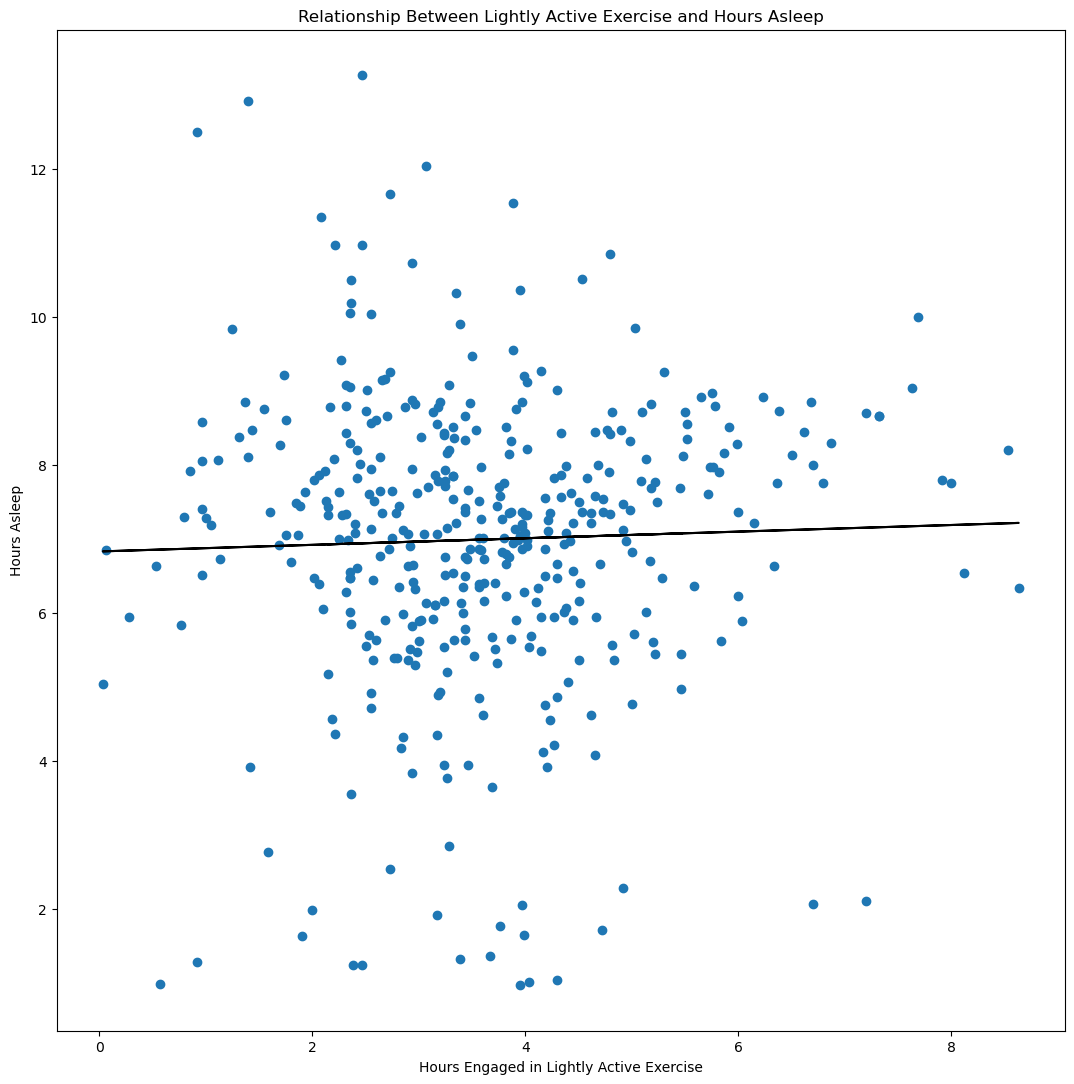

In [71]:
#Linear Regression for Lightly Active Minutes

lightly_active = merged_df["LightlyActiveHours"]

slope_active = 0.044687884201126904
x_active = lightly_active
intercept_active = 6.829608894393175
Best_Fit_Line_active = slope_active*x_active + intercept_active

plt.scatter(lightly_active, asleep, label="Lightly Active Hours")
plt.plot(lightly_active, Best_Fit_Line_active, color = "k")
plt.xlabel("Hours Engaged in Lightly Active Exercise")
plt.ylabel("Hours Asleep")
plt.title("Relationship Between Lightly Active Exercise and Hours Asleep")
st.pearsonr(lightly_active, asleep)
st.linregress(lightly_active, asleep)

plt.savefig('Figures/Relationship Between Lightly Active Exercise and Hours Asleep', bbox_inches='tight')

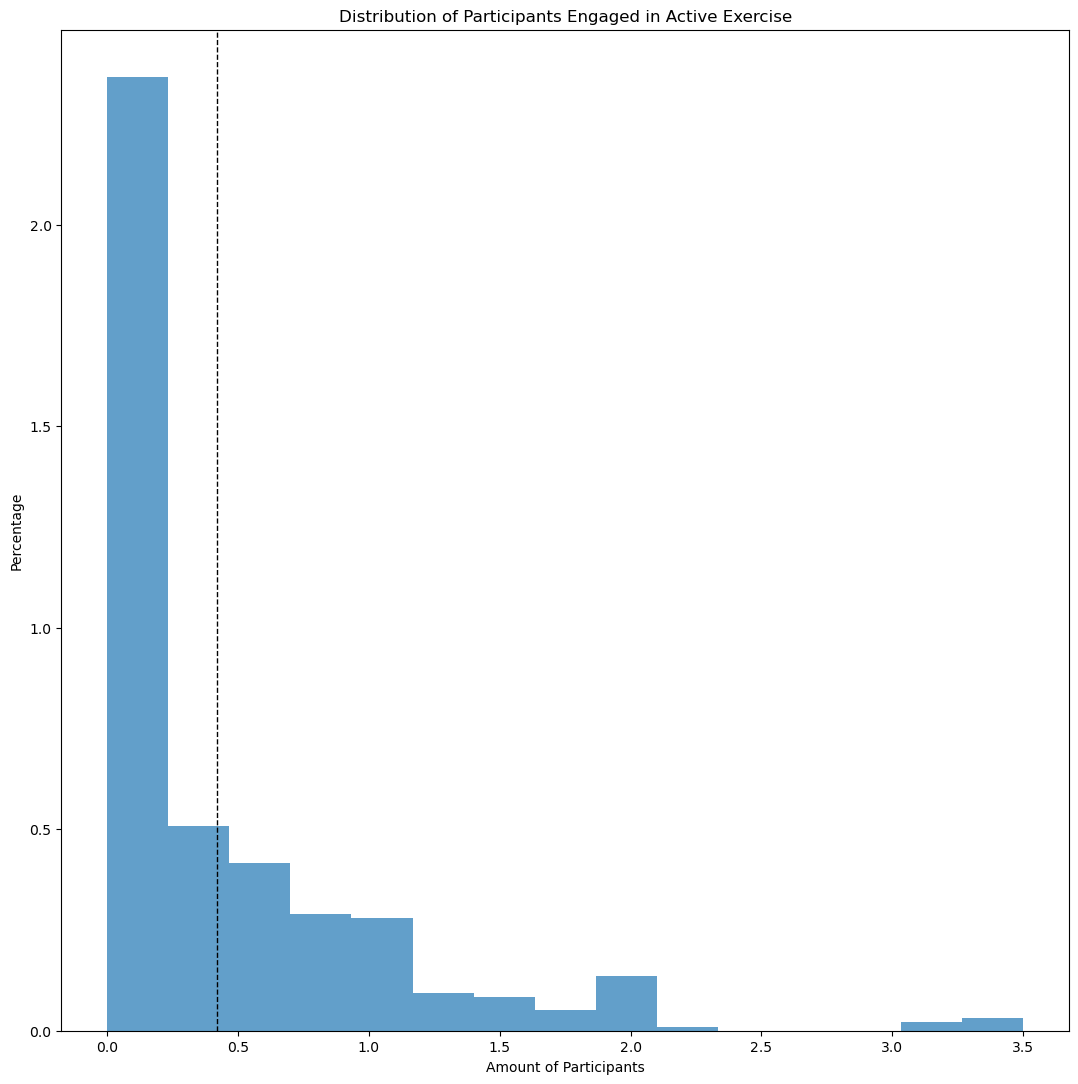

<Figure size 1300x1300 with 0 Axes>

In [72]:
#Histogram for Very Active Duration
plt.hist(very_active, 15, density=True, alpha=0.7, label="Very Active Hours")
plt.axvline(very_active.mean(), color="k", linestyle="dashed", linewidth=1)
plt.xlabel("Amount of Participants")
plt.ylabel("Percentage")
plt.title("Distribution of Participants Engaged in Active Exercise")
plt.show()

plt.savefig('Figures/Distribution of Participants Engaged in Active Exercise', bbox_inches='tight')

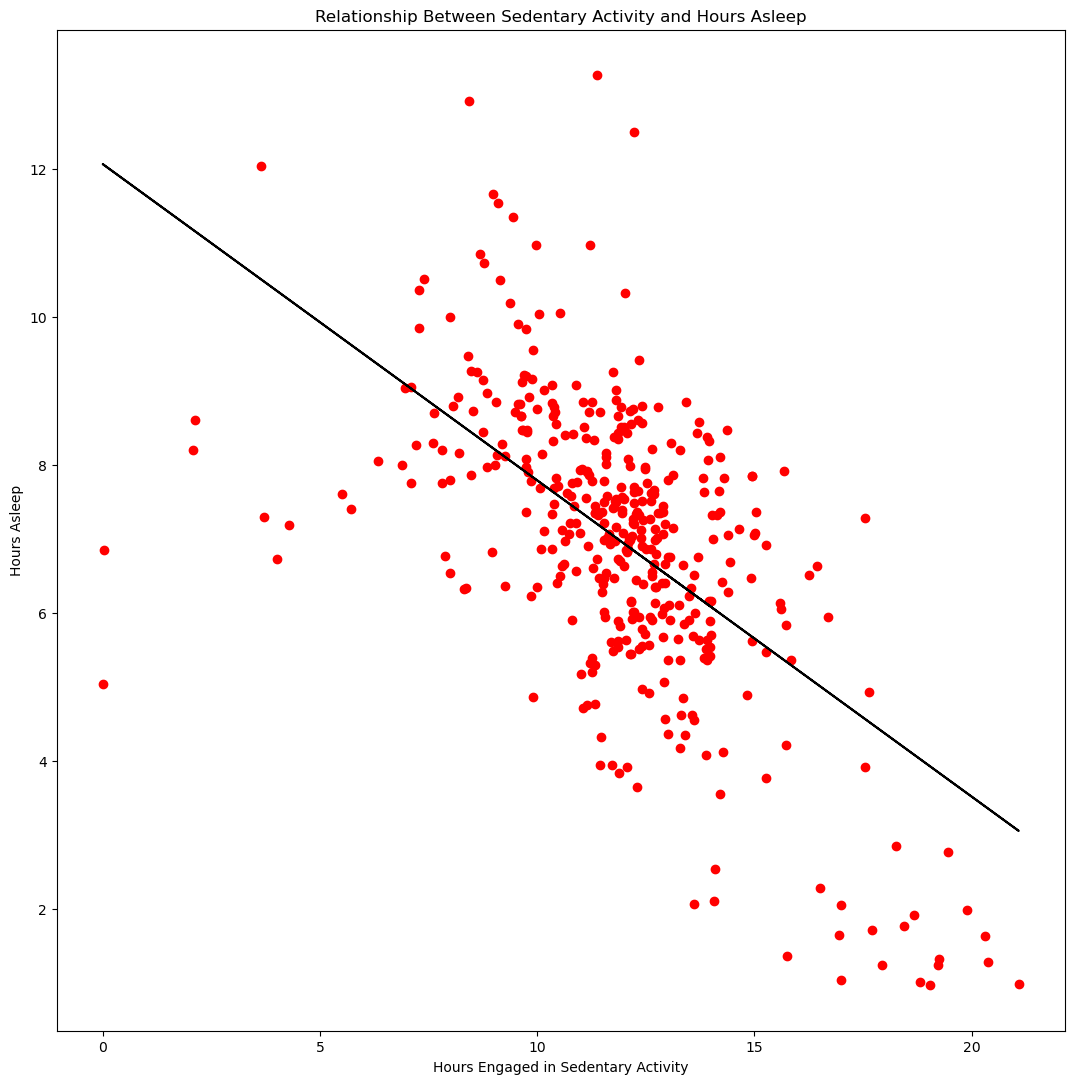

In [73]:
#Linear Regression for Sedentary Minutes

slope_sedentary = -0.42742943478885836
x_sedentary = sedentary
intercept_sedentary = 12.064491926420814
Best_Fit_Line_Sedentary = slope_sedentary*x_sedentary + intercept_sedentary

plt.scatter(sedentary, asleep, color = "r", label="Sedentary Hours")
plt.plot(sedentary, Best_Fit_Line_Sedentary, color = "k")
plt.xlabel("Hours Engaged in Sedentary Activity")
plt.ylabel("Hours Asleep")
plt.title("Relationship Between Sedentary Activity and Hours Asleep")
st.pearsonr(sedentary, asleep)
st.linregress(sedentary, asleep)

plt.savefig('Figures/Relationship Between Sedentary Activity and Hours Asleep', bbox_inches='tight')

In [74]:
#Stress Dataset

In [75]:
#Displaying the sleep and stress dataframe
csv_reader_stress = pd.read_csv(csv_stress)
stress_dataset = csv_reader_stress
stress_dataset

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,None
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,370,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
370,371,Female,59,Nurse,8.0,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
371,372,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
372,373,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea


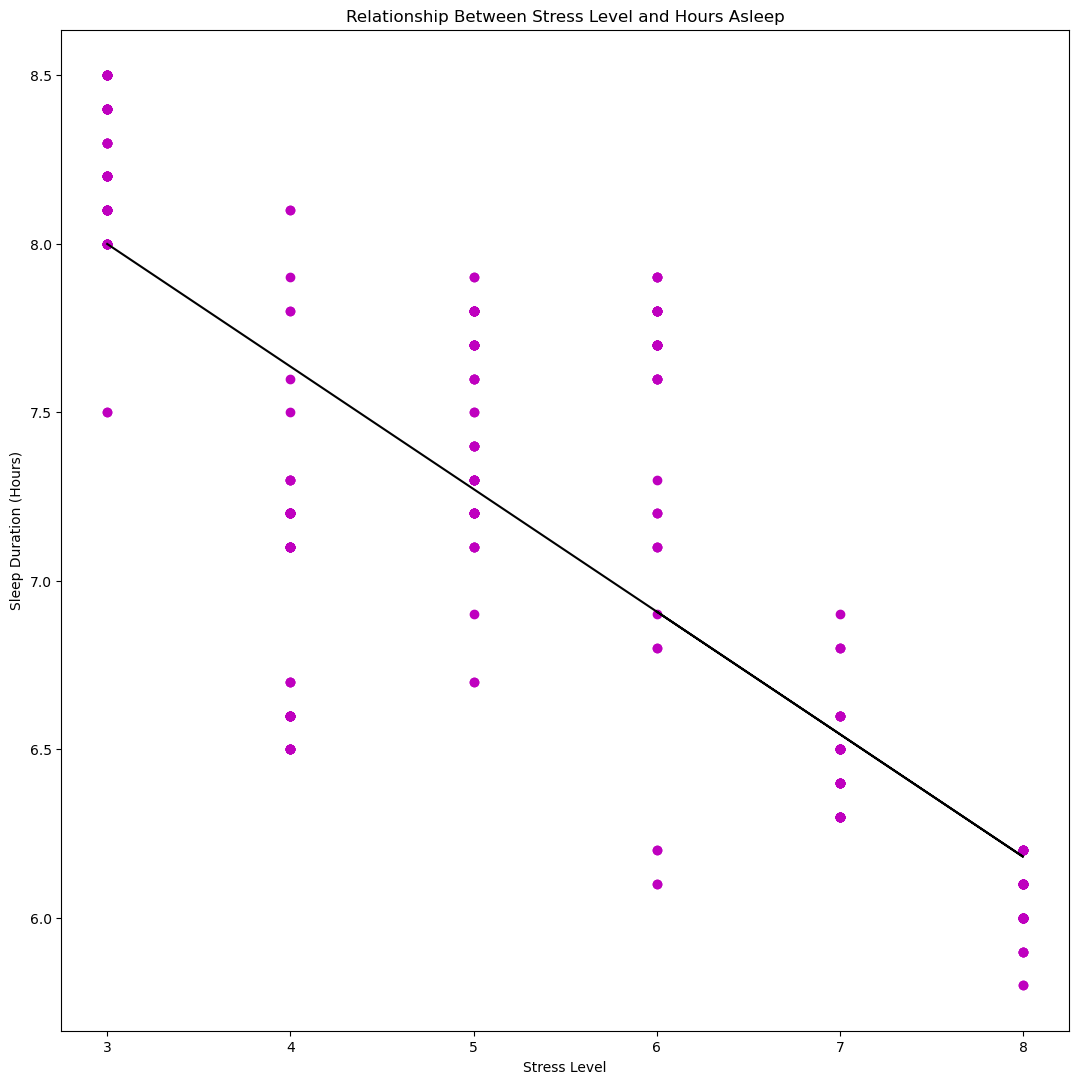

In [76]:
#Linear Regression for Stress Level

stress_level = stress_dataset["Stress Level"]
sleep_duration = stress_dataset["Sleep Duration"]

slope = -0.36364402072463375
intercept = 9.090318336201637
x = stress_level
Best_Fit_Line = slope*x + intercept

plt.scatter(stress_level, sleep_duration, color = "m", label="Level of Self-Reported Stress")
plt.plot(stress_level, Best_Fit_Line, color = "k")
plt.xlabel("Stress Level")
plt.ylabel("Sleep Duration (Hours)")
plt.title("Relationship Between Stress Level and Hours Asleep")
st.pearsonr(stress_level, sleep_duration)
st.linregress(stress_level, sleep_duration)

plt.savefig('Figures/Relationship Between Stress Level and Hours Asleep', bbox_inches='tight')

In [77]:
#Equations for Stress Level
RSquared_Value_Stress = -0.8110230278940435*-0.8110230278940435
print(f"{RSquared_Value_Stress}")

0.6577583517744224


In [78]:
#Equations for Sedentary time
RSquared_Value_Sedentary = -0.59939400560339*-0.59939400560339
print(f"{RSquared_Value_Sedentary}")

0.3592731739532767


In [79]:
#Equations for Active Time
RSquared_Value_Active = -0.09043627943527563*-0.09043627943527563
print(f"{RSquared_Value_Active}")

0.008178720638095258


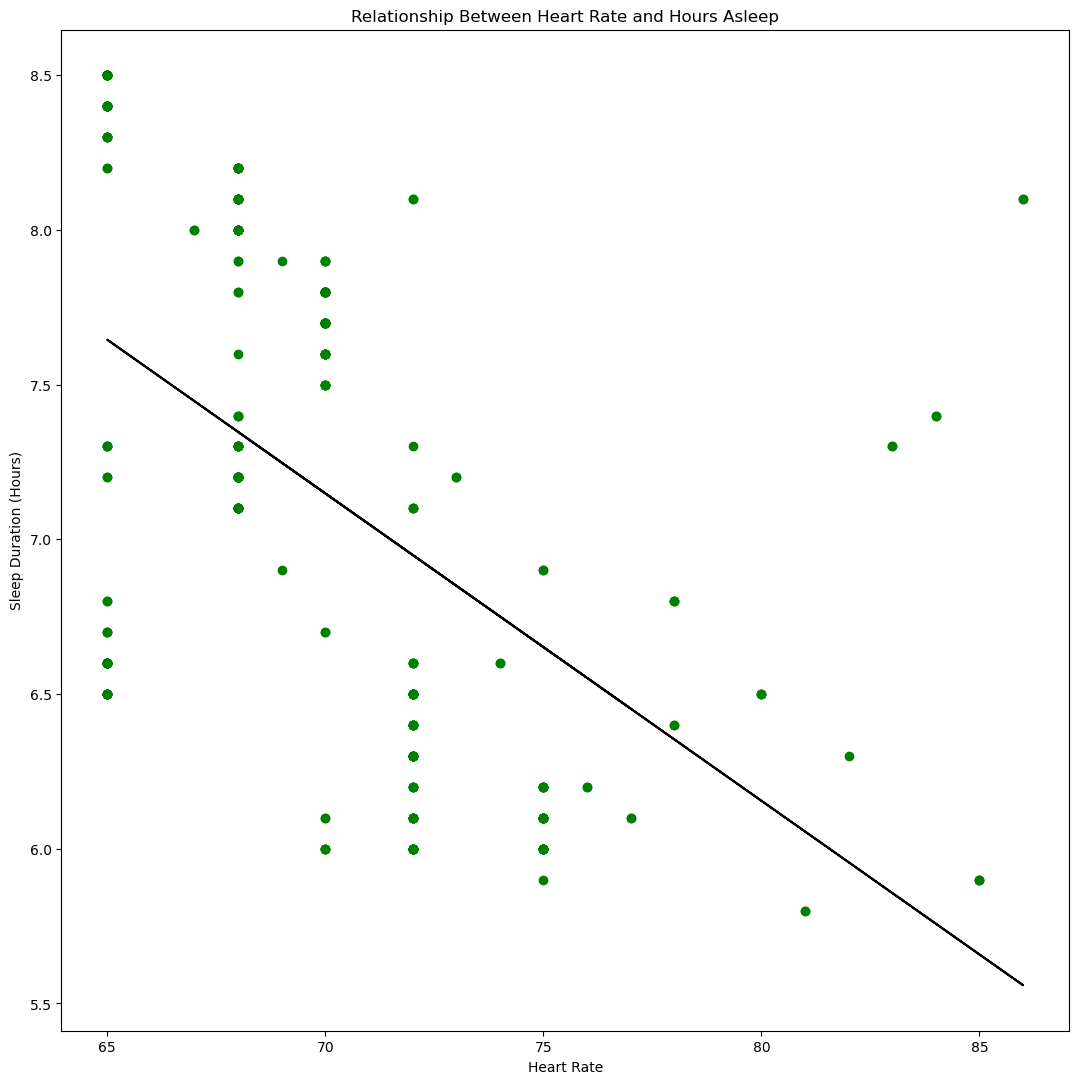

In [80]:
#Linear Regression for Heart Rate

heart_rate = stress_dataset["Heart Rate"]
sleep_duration = stress_dataset["Sleep Duration"]

slope =-0.09936002105601985
intercept = 14.103758482759552
x = heart_rate
Best_Fit_Line = slope*x + intercept

plt.scatter(heart_rate, sleep_duration, color = "g", label="Heart Rate Registered")
plt.plot(heart_rate, Best_Fit_Line, color = "k")
plt.xlabel("Heart Rate")
plt.ylabel("Sleep Duration (Hours)")
plt.title("Relationship Between Heart Rate and Hours Asleep")
st.pearsonr(heart_rate, sleep_duration)
st.linregress(heart_rate, sleep_duration)

plt.savefig('Figures/Relationship Between Heart Rate and Hours Asleep', bbox_inches='tight')

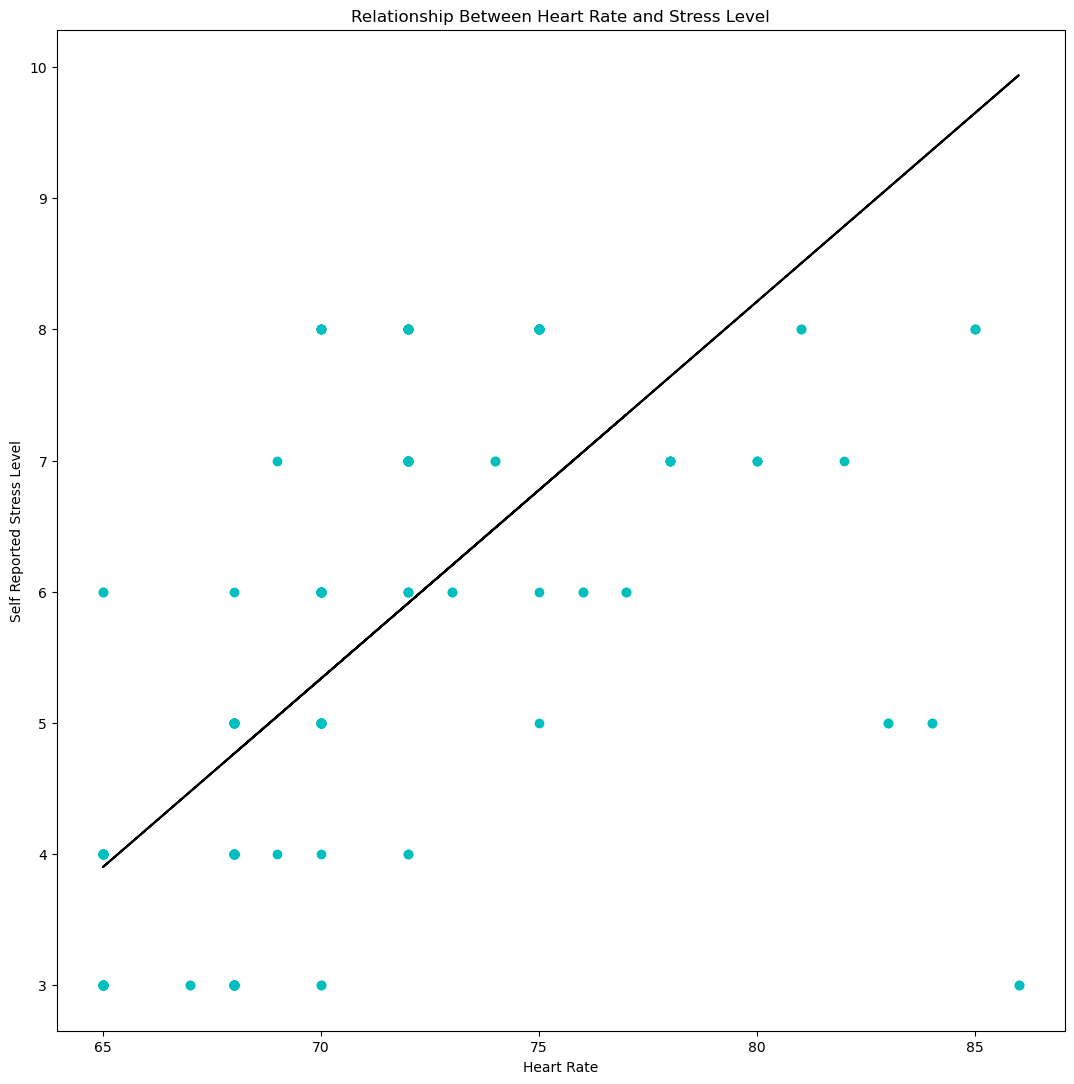

In [81]:
#Linear Regression for Stress Level & Heart Rate

heart_rate = stress_dataset["Heart Rate"]
stress_level = stress_dataset["Stress Level"]

slope =0.28749346190469816
intercept = -14.787174939313074
x = heart_rate
Best_Fit_Line = slope*x + intercept

plt.scatter(heart_rate, stress_level, color = "c", label="Heart Rate Registered")
plt.plot(heart_rate, Best_Fit_Line, color = "k")
plt.xlabel("Heart Rate")
plt.ylabel("Self Reported Stress Level")
plt.title("Relationship Between Heart Rate and Stress Level")
st.pearsonr(heart_rate, stress_level)
st.linregress(heart_rate, stress_level)

plt.savefig('Figures/Relationship Between Heart Rate and Stress Level', bbox_inches='tight')